<a href="https://colab.research.google.com/github/github-ashwin/DeepLearning-Lab/blob/main/InceptionNet_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import UpSampling2D,GlobalAveragePooling2D,Dense,Dropout
import matplotlib.pyplot as plt

In [10]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [13]:
inception_model = InceptionV3(weights='imagenet',include_top=False,input_shape=(96,96,3))

In [14]:
inception_model.trainable = False

In [15]:
model = Sequential()

model.add(UpSampling2D(size=(3,3),interpolation='bilinear'))
model.add(inception_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d_1 (UpSampling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 1, 1, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [18]:
history = model.fit(x_train,y_train,batch_size=64,epochs=5,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 47ms/step - accuracy: 0.5078 - loss: 1.4668 - val_accuracy: 0.6443 - val_loss: 1.0245
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6404 - loss: 1.0454 - val_accuracy: 0.6710 - val_loss: 0.9651
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.6665 - loss: 0.9647 - val_accuracy: 0.6773 - val_loss: 0.9461
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6794 - loss: 0.9157 - val_accuracy: 0.6791 - val_loss: 0.9399
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6935 - loss: 0.8755 - val_accuracy: 0.6804 - val_loss: 0.9392


In [19]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6802 - loss: 0.9388


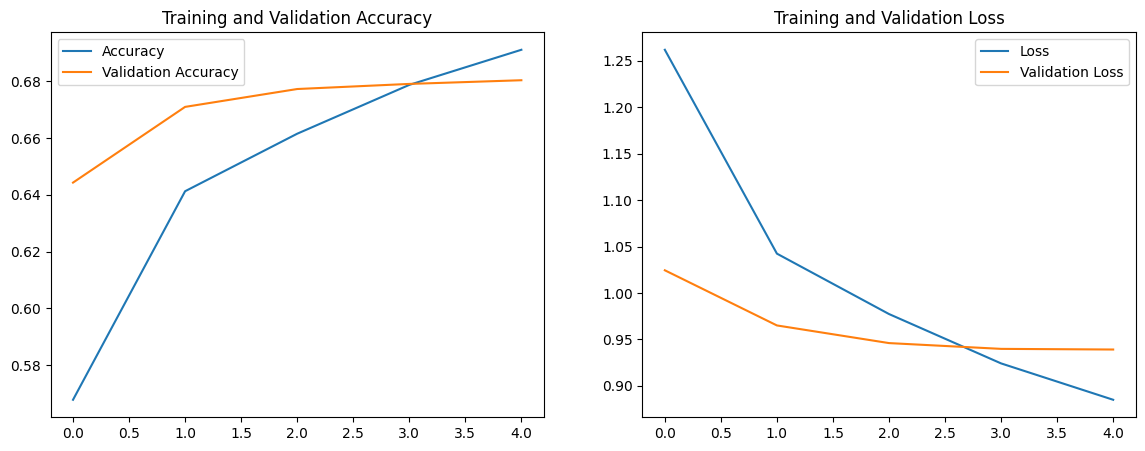

In [22]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy")
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.title("Training and Validation Loss")
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.plot()
plt.legend()
plt.show()